In [27]:
import numpy as np   # Some basic libraries
import pandas as pd
import matplotlib.pyplot as plt  #A visualization library
from sklearn.neural_network import MLPRegressor  #Importing MLP from sklearn
from math import sqrt                      #Some libraries for error calculation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split  #Split the data set
from sklearn import preprocessing  #preprocessing library

In [29]:
#columns name 
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Data load from csv file
df = pd.read_csv(r'D:\DSML\7. Neural Networks\housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [31]:
print('Name of columns', df.columns,'\nShape of data', np.shape(df))

Name of columns Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object') 
Shape of data (506, 14)


In [33]:
#A brief statistical details
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
#Select all columns (except MEDV) as input features set
X = df.drop(['MEDV'], axis=1)
print('Shape of input feature:',X.shape)
#Preprocessing is done
X = preprocessing.scale(X)
print(X)

Shape of input feature: (506, 13)
[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


In [37]:
#Select the target variable
Y=df['MEDV']
print('Shape of target:', Y.shape)

Shape of target: (506,)


In [39]:
#The actual data is splited into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [41]:
#The MLP algorithm with some hyperparameters
#model = MLPRegressor(hidden_layer_sizes=[40,40],activation='relu',alpha=0.001,
       #            learning_rate ='constant', max_iter=1000,random_state=11)
model = MLPRegressor(
    hidden_layer_sizes=[400, 400, 400, 300],  # Equivalent to Dense layers
    activation='relu',  # ReLU activation
    alpha=0.0,  # No regularization (Dropout is not supported in MLPRegressor)
    learning_rate='constant',  # Constant learning rate
    learning_rate_init=0.001,  # Learning rate matches the SGD optimizer in Keras
    max_iter=1000,  # Number of iterations
    random_state=11  # For reproducibility
)
#Model is trained on training dataset
model.fit(X_train,y_train)

MLPRegressor(alpha=0.0, hidden_layer_sizes=[400, 400, 400, 300], max_iter=1000,
             random_state=11)

In [43]:
#Predictions are done on input test and train
y_predtest = model.predict(X_test)
y_predtrain = model.predict(X_train)

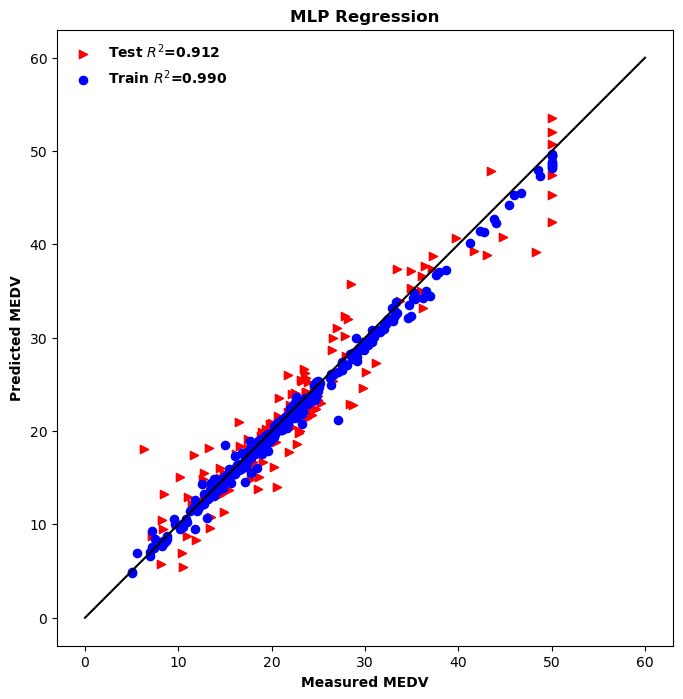

In [45]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('MLP_1.pdf', dpi=5000)  # Save the plot in pdf
plt.show()

In [47]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

parameter for train
mean_squared_error: 0.7805505938529452
mean_absolute_error: 0.6602430871316738
root mean squared error: 0.8834877440309771
MPAE: 3.2276365558225493

R2 value_train: 0.9903860130585861

parameter for testing
mean_squared_error: 8.106493214894023
mean_absolute_error: 2.1172279381752848
root mean squared error: 2.847190407207432
MPAE: 11.427839190815837

R2 value_test: 0.911553776893758


**Nerual network by using keras framework**

In [49]:
#Import some crucial tools from tensorflow library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout,Dense,Input
from tensorflow.keras import Sequential

In [51]:
#The weight initiatization is fixed
import random
random.seed(11)

In [53]:
import tensorflow as tf

def r_square(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))  # Residual sum of squares
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))  # Total sum of squares
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())  # Avoid division by zero


In [55]:

#Architcture of NN with dropout layer
def create_model():
    model = Sequential([
        Input(shape=(13,)),  # Explicit input layer
        Dense(400, activation='relu'),
        Dropout(0.20),
        Dense(400, activation='relu'),
        Dropout(0.20),
        Dense(400, activation='relu'),
        Dropout(0.20),
        Dense(300, activation='relu'),
        Dropout(0.20),
        Dense(1)  # Output layer
    ])
    # Compile model
    sgd = keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = [r_square])
    #adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    #model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=adam, metrics = [r_square])
    return model
#Model is called here
model=create_model()

In [57]:
model = model.fit(X_train, # Features
                      y_train, # Target vector
                      epochs = 100,
                      verbose = 1,
                      validation_split = 0.2) # Data for evaluation

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 563.5324 - r_square: -5.9161 - val_loss: 338.3598 - val_r_square: -3.5499
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 195.2717 - r_square: -2.5428 - val_loss: 50.2576 - val_r_square: 0.3749
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 43.6340 - r_square: 0.4032 - val_loss: 49.2770 - val_r_square: 0.4026
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 32.6814 - r_square: 0.5881 - val_loss: 25.9994 - val_r_square: 0.7049
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 32.2853 - r_square: 0.5637 - val_loss: 23.7200 - val_r_square: 0.7405
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 25.5998 - r_square: 0.6123 - val_loss: 21.5447 - val_r_square: 0.7437
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 21.3855 - r_square: 0.7037 - val_loss: 20.1065 - val_r_square: 0.7527
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 27.5124 - r_square: 0.6852 - val_loss: 2

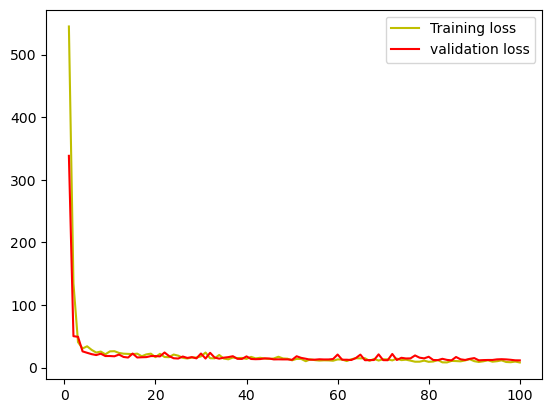

In [59]:
#Loss v/s epochs plot
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend( loc ='best')
plt.show()

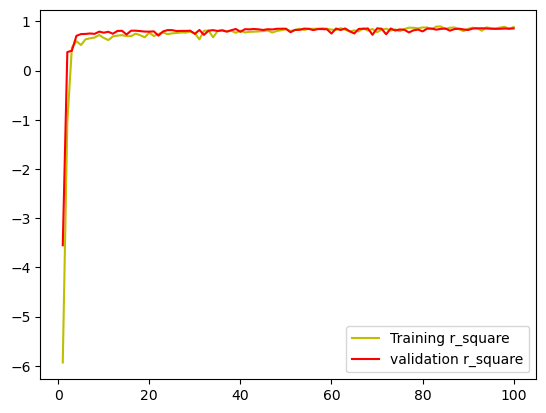

In [61]:
#R_square v/s epochs plot
r_square = model.history['r_square']
val_r_square = model.history['val_r_square']
epochs = range(1,len(loss)+1)
plt.plot(epochs, r_square, 'y', label='Training r_square')
plt.plot(epochs, val_r_square, 'r', label='validation r_square')
plt.legend(loc ='best')
plt.show()

In [63]:
#Predictions on input test and train
y_predtest = model.model.predict(X_test)
y_predtrain = model.model.predict(X_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


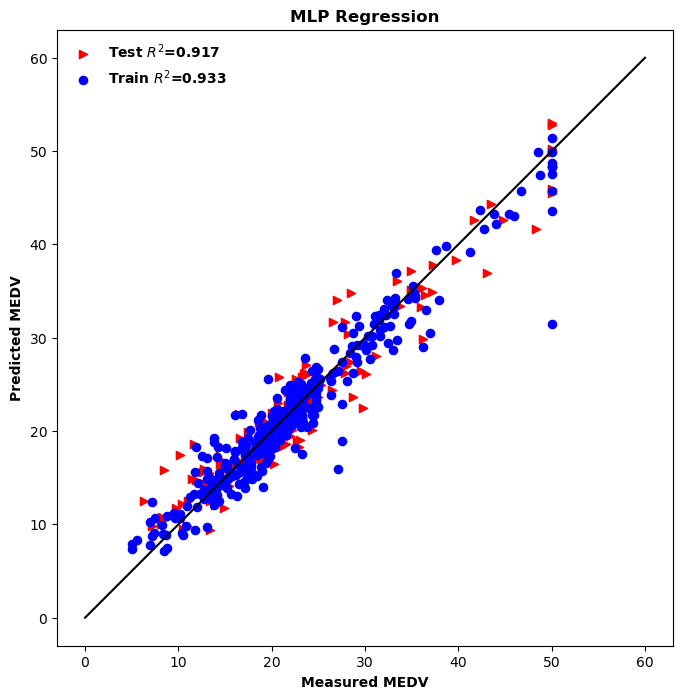

In [65]:
#A scatter plot with a metric r_square
plt.figure(figsize = (8,8))
plt.plot([0,60],[0,60],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('NN.pdf', dpi=5000)   # Save the plot in pdf
plt.show()

In [67]:
#Conversion of array to list
def ndarray_series(y_predtest):
    list1 = []
    for i in y_predtest:
        list1.append(i[0])
    return list1

In [69]:
y_predtrain =  ndarray_series(y_predtrain)
y_predtest =  ndarray_series(y_predtest)

In [71]:
#Some important metrics for our trained model for train and test set
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

parameter for train
mean_squared_error: 5.46813362259466
mean_absolute_error: 1.6106942114856957
root mean squared error: 2.3384040759874374
MPAE: 8.494964768713867

R2 value_train: 0.9326493815320374

parameter for testing
mean_squared_error: 7.62520653746513
mean_absolute_error: 2.134399756632353
root mean squared error: 2.761377652090552
MPAE: 11.470265416114497

R2 value_test: 0.9168048747139262
